In [1]:
# adapted from 
# https://stackoverflow.com/questions/54797187/harmonic-motion-animation-with-python

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
import os
from natsort import natsorted
import matplotlib.lines as lines


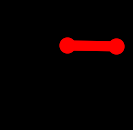

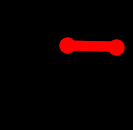

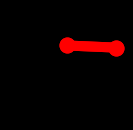

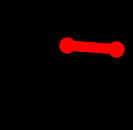

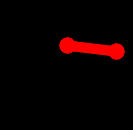

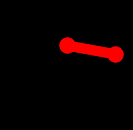

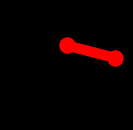

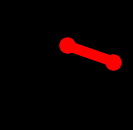

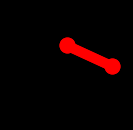

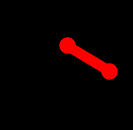

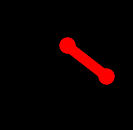

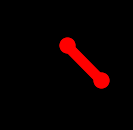

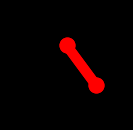

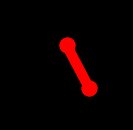

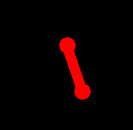

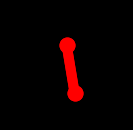

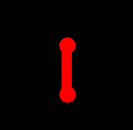

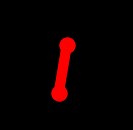

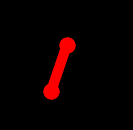

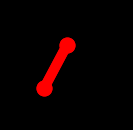

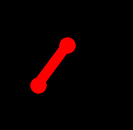

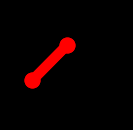

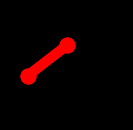

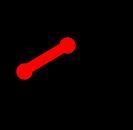

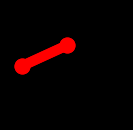

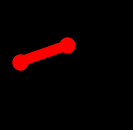

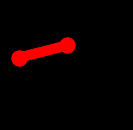

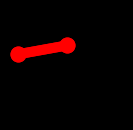

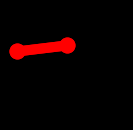

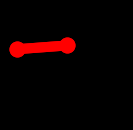

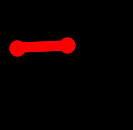

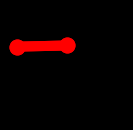

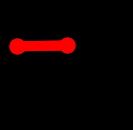

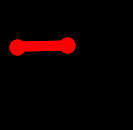

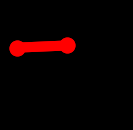

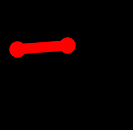

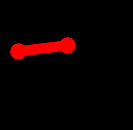

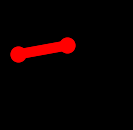

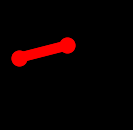

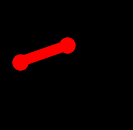

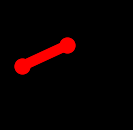

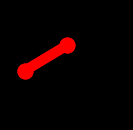

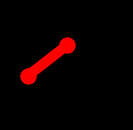

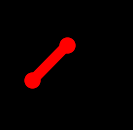

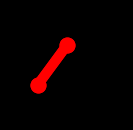

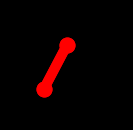

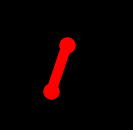

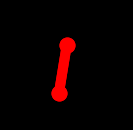

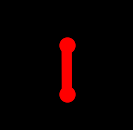

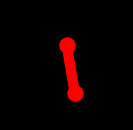

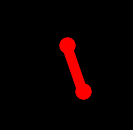

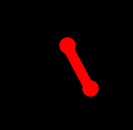

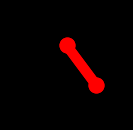

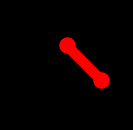

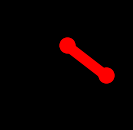

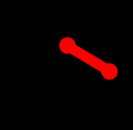

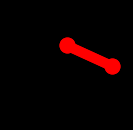

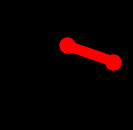

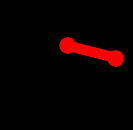

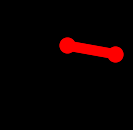

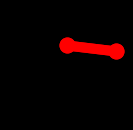

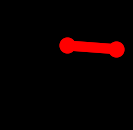

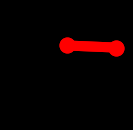

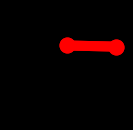

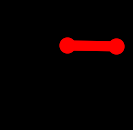

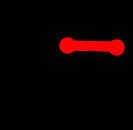

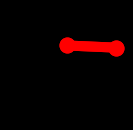

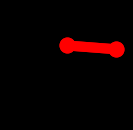

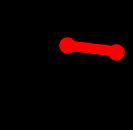

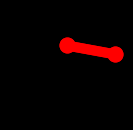

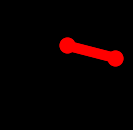

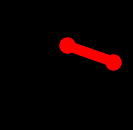

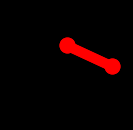

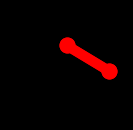

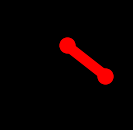

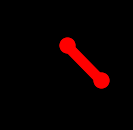

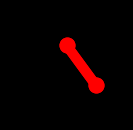

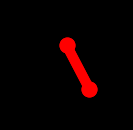

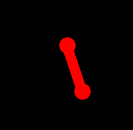

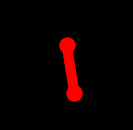

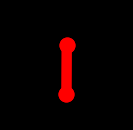

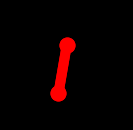

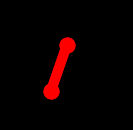

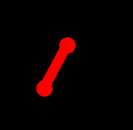

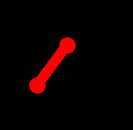

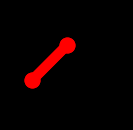

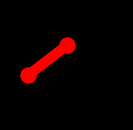

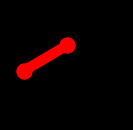

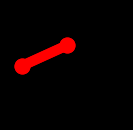

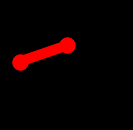

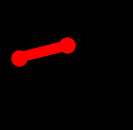

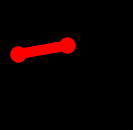

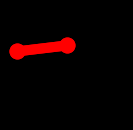

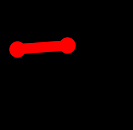

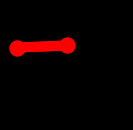

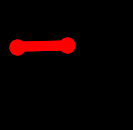

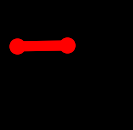

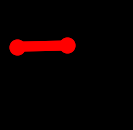

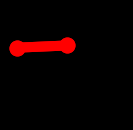

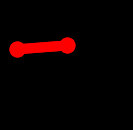

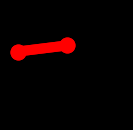

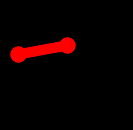

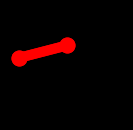

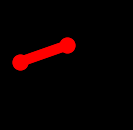

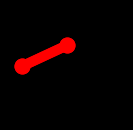

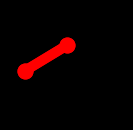

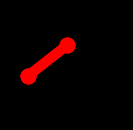

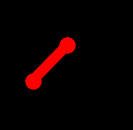

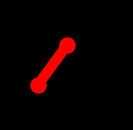

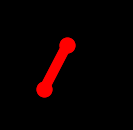

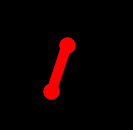

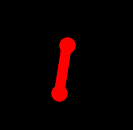

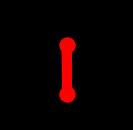

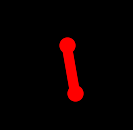

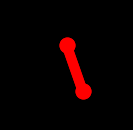

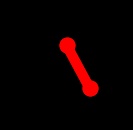

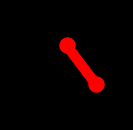

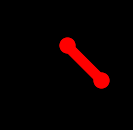

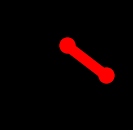

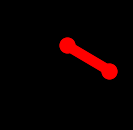

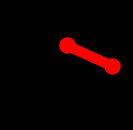

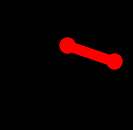

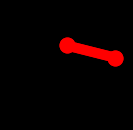

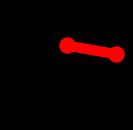

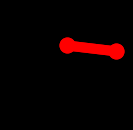

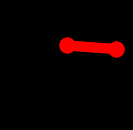

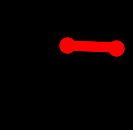

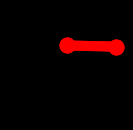

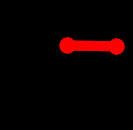

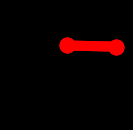

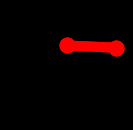

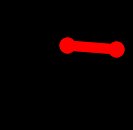

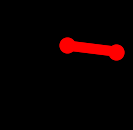

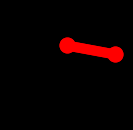

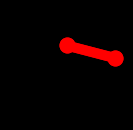

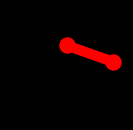

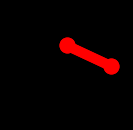

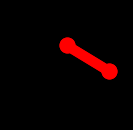

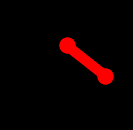

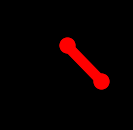

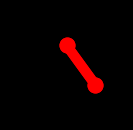

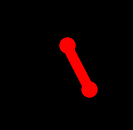

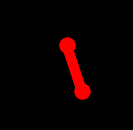

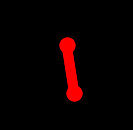

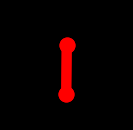

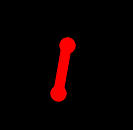

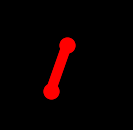

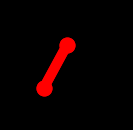

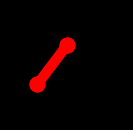

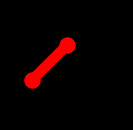

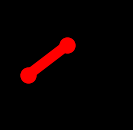

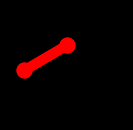

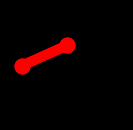

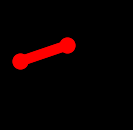

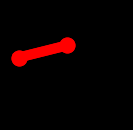

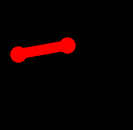

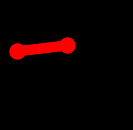

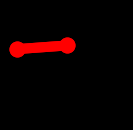

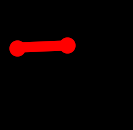

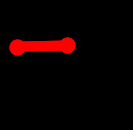

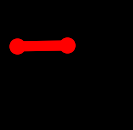

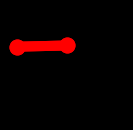

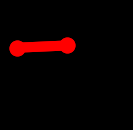

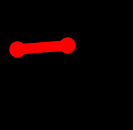

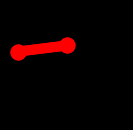

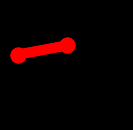

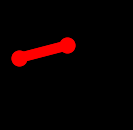

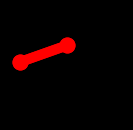

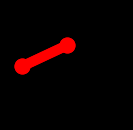

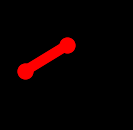

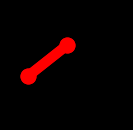

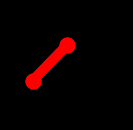

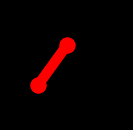

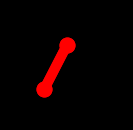

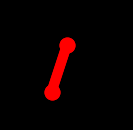

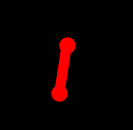

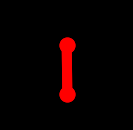

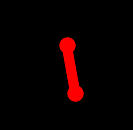

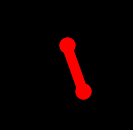

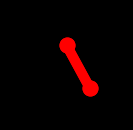

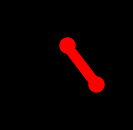

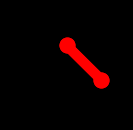

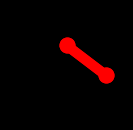

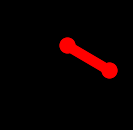

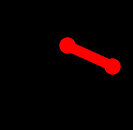

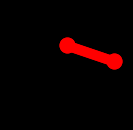

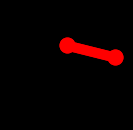

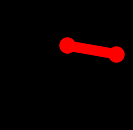

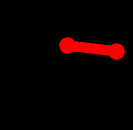

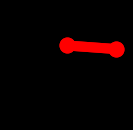

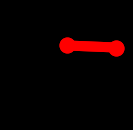

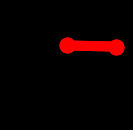

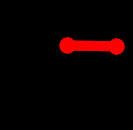

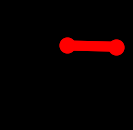

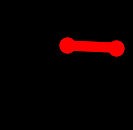

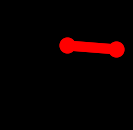

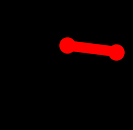

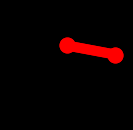

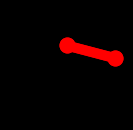

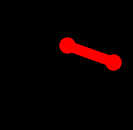

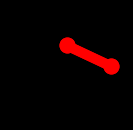

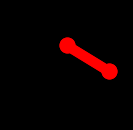

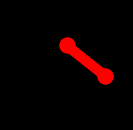

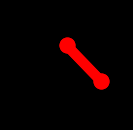

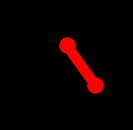

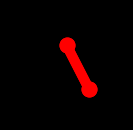

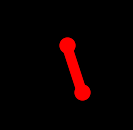

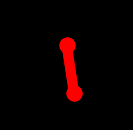

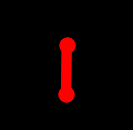

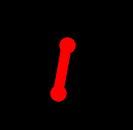

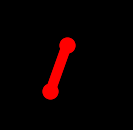

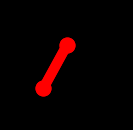

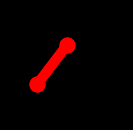

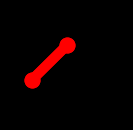

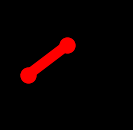

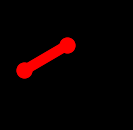

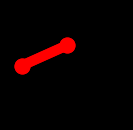

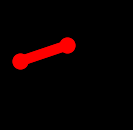

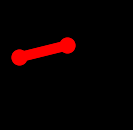

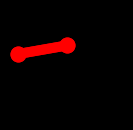

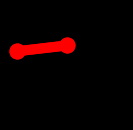

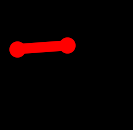

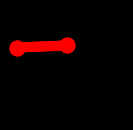

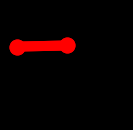

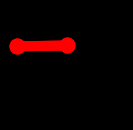

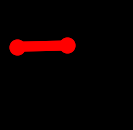

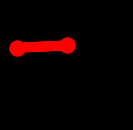

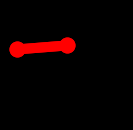

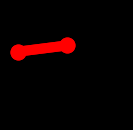

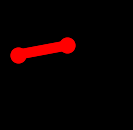

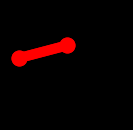

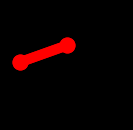

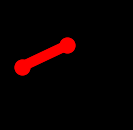

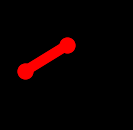

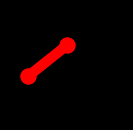

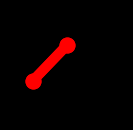

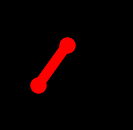

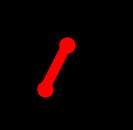

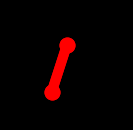

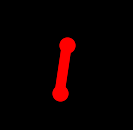

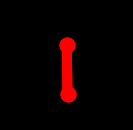

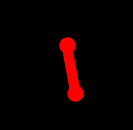

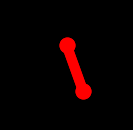

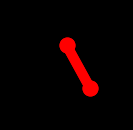

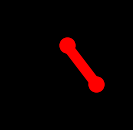

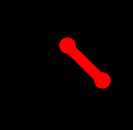

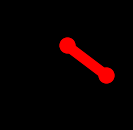

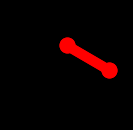

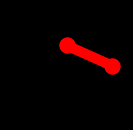

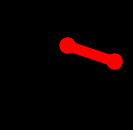

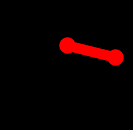

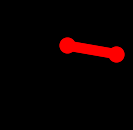

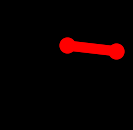

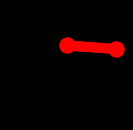

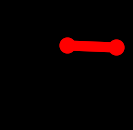

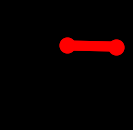

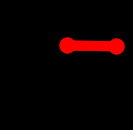

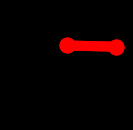

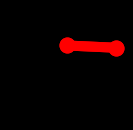

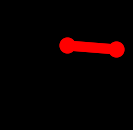

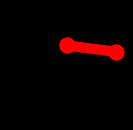

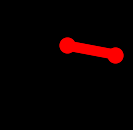

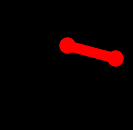

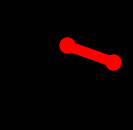

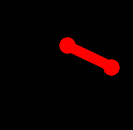

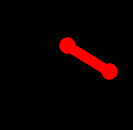

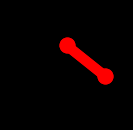

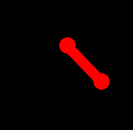

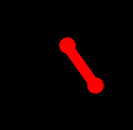

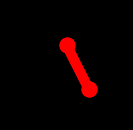

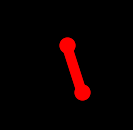

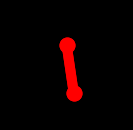

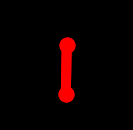

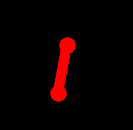

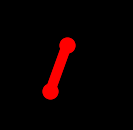

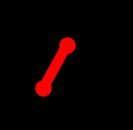

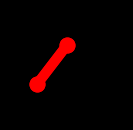

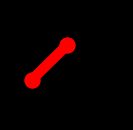

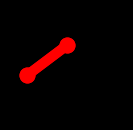

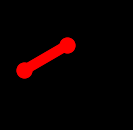

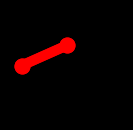

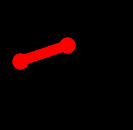

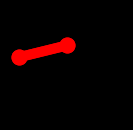

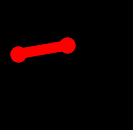

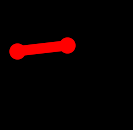

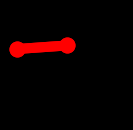

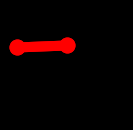

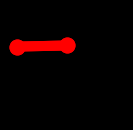

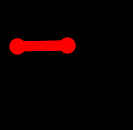

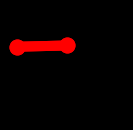

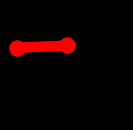

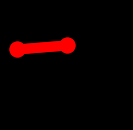

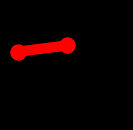

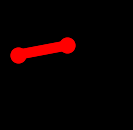

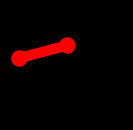

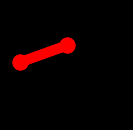

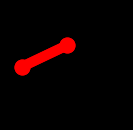

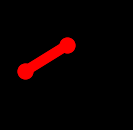

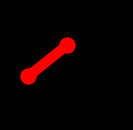

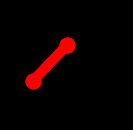

In [124]:


g = 3
l = 0.25
m = 0.01


def sh(r, t):
	theta, omega = r
	sh_theta = omega
	sh_omega = -g / l * sin(theta)
	return np.array([sh_theta, sh_omega], float)


init_state = np.radians([89.0, 0])
dt = 1.0 / 30
time = np.arange(0, 50.0, dt)

state = integrate.odeint(sh, init_state, time)

# ==========================================
##initialisation function: plot the background of each frame
def init():
	return line,


def animate(i):
	x = time[i:i + 30]
	y = state[i:i + 30, 0]

	line.set_data(x, y)
	return line,


def init():
    return line,

def animate(i):

    phi = state[i,0]

    line.set_data([0,l*sin(phi)],[0,-l*cos(phi)])
    return line,


for i in range(300):
    fig = plt.figure(figsize=(64/30,64/30))
    ax = plt.axes(xlim=(-.3,.3), ylim=(-.4,.2))
    line, = ax.plot([],[],'-o',lw=10,ms=15, color='r')
    fig.lines.extend([animate(i)[0]])
    plt.axis('off')
    ax.set_facecolor('k')
    plt.savefig('./data/pendulum/fast/red/{:03d}.png'.format(i),facecolor='k', dpi=30)
    plt.show()

In [67]:
rootdir = '/data/pendulum/'
root = os.path.join(rootdir,'fast')
colors = os.listdir(root)
N = 300
imgs_fast = np.zeros((len(colors), N//2, 64, 64, 3)).astype('float32')
labels_fast = np.zeros((len(colors),2))
i = 0
c = 0
for color in colors:
    image_files = natsorted(os.listdir(os.path.join(root, color)))
    i = 0
    for image_file in image_files[1::2]:
        imgs_fast[c, i] = plt.imread(os.path.join(root, color, image_file))[:,:,:3]
        labels_fast[c,1] = c 
        
        i += 1
    c += 1 
    

        

In [68]:

root = os.path.join(rootdir,'slow')
colors = os.listdir(root)
N = 300
imgs_slow = np.zeros((len(colors), N//2, 64, 64, 3)).astype('float32')
labels_slow = np.zeros((len(colors),2))
i = 0
c = 0
for color in colors:
    image_files = natsorted(os.listdir(os.path.join(root, color)))
    i = 0
    for image_file in image_files[1::2]:
        imgs_slow[c, i] = plt.imread(os.path.join(root, color, image_file))[:,:,:3]
        labels_slow[c,1] = c 
        
        i += 1
    c += 1 

In [71]:
imgs = np.concatenate((imgs_fast, imgs_slow),0)
labels = np.concatenate((labels_fast,labels_slow),0)